In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, ZeroPadding2D
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_gen = image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2)

val_gen = image.ImageDataGenerator(rescale = 1/255)

data_train=train_gen.flow_from_directory('/content/drive/MyDrive/Corona_lung/dataset/train',
                                         target_size=(256,256),batch_size=2)

data_val = val_gen.flow_from_directory("/content/drive/MyDrive/Corona_lung/dataset/val",
                                         target_size=(256,256),batch_size=16,class_mode='binary')

Found 240 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
model=Sequential()
import tensorflow as tf

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.75))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.BinaryAccuracy(),
#                        tf.keras.metrics.FalseNegatives()])


In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# model.compile(optimizer='adam',loss = 'binary',
#               metrics=['accuracy'])


In [ ]:
hs=model.fit_generator(data_train,steps_per_epoch=30,epochs=50,validation_data=data_val)

Epoch 1/50
 1/30 [>.............................] - ETA: 2s - loss: 0.6387 - accuracy: 0.6667

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


30/30 [==============================] - 4s 127ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 1.3969 - val_accuracy: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 4s 126ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 1.4350 - val_accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 4s 109ms/step - loss: 0.6378 - accuracy: 0.6667 - val_loss: 1.3932 - val_accuracy: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 3s 115ms/step - loss: 0.6380 - accuracy: 0.6667 - val_loss: 1.3228 - val_accuracy: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 4s 119ms/step - loss: 0.6378 - accuracy: 0.6667 - val_loss: 1.3540 - val_accuracy: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 4s 130ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 1.3624 - val_accuracy: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 4s 130ms/step - loss: 0.6374 - accuracy: 0.6667 - val_loss: 1.3964 - val_accuracy: 

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

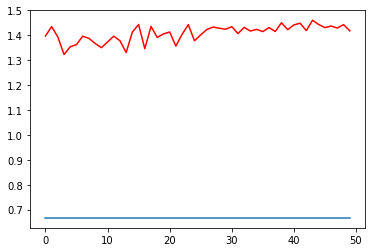

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_loss'],c="red")

plt.show()